### Show issue of LFC Inflation

In [20]:
%load_ext autoreload
%autoreload 2

import crispr_shrinkage
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import expon
import numpy as np 

null_proportion = 0.5
positive_proportion = 0.6
target_null_proportion = 0.5
target_positive_population = 0.6

num_ctrl_guides = 50
num_pos_guides = 10

reps = 3
max_dup_factor = 1
max_guide_molecule_factor = 500

pop1_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])
pop2_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])

#expon.rvs(loc=1, scale=1000, size=num_guides)
#uniform.rvs(2, 200, size=num_guides)
def get_counts(num_guides, proportion):
    pop1_list_reps = []
    pop2_list_reps = []

    for rep_i in range(reps):
        n_list = np.round(uniform.rvs(2, max_guide_molecule_factor, size=num_guides)).astype(int)
        pop1_list = binom.rvs(n_list, proportion, size=num_guides) 
        pop2_list = n_list - pop1_list

        pop1_list_reps.append(pop1_list * pop1_dup_factor_list[rep_i])
        pop2_list_reps.append(pop2_list * pop2_dup_factor_list[rep_i])
    
    return np.asarray(pop1_list_reps), np.asarray(pop2_list_reps)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
tiling_length = 200

observation_guides = []
for position in range(tiling_length):
    counts = get_counts(1, target_null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="observation_{}".format(position), position=position, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    observation_guides.append(guide)

observation_guides = np.asarray(observation_guides)

Text(0.5, 1.0, 'Simulated Tiling Screen Null Scores')

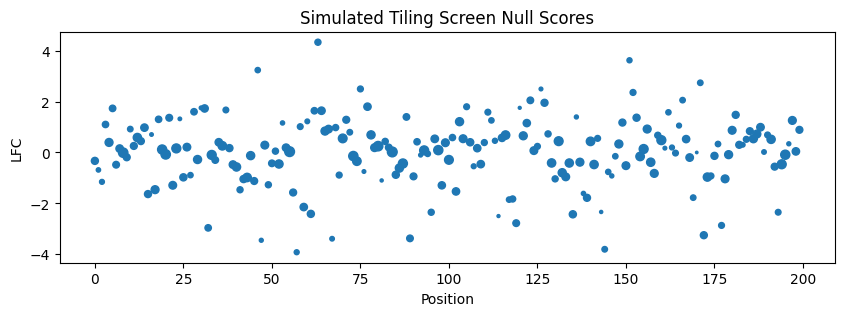

In [135]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (10,3)

positions = np.asarray([guide.position for guide in observation_guides])
lfc_scores = np.asarray([np.log(guide.pop1_raw_count_reps[0]/guide.pop1_raw_count_reps[1]) for guide in observation_guides])
total_counts = np.asarray([guide.pop1_raw_count_reps[0]+guide.pop1_raw_count_reps[1] for guide in observation_guides])
plt.scatter(positions, lfc_scores, s=0.05*total_counts)
plt.xlabel("Position")
plt.ylabel("LFC")
plt.title("Simulated Tiling Screen Null Scores")

Text(0.5, 1.0, '')

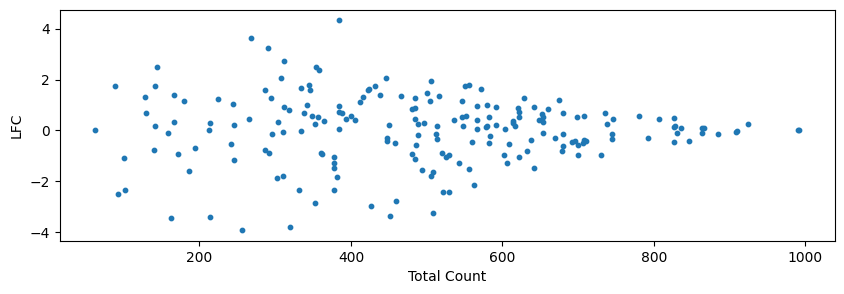

In [49]:
argsort_count = np.argsort(total_counts)
plt.scatter(total_counts[argsort_count], lfc_scores[argsort_count], s=10)
plt.xlabel("Total Count")
plt.ylabel("LFC")
plt.title("")

### Show issue with Deconvolution

0.07978845608028655

Text(0.5, 1.0, 'Simulated Tiling Screen Signal')

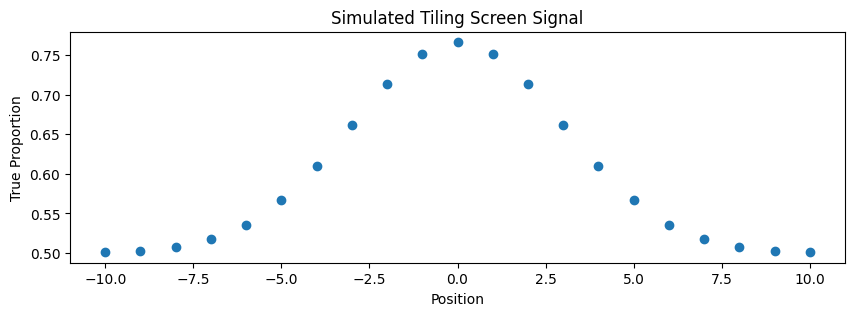

In [139]:
positions = np.asarray(range(-10, 11))
positional_scores = 0.5 + (np.asarray([crispr_shrinkage.StatisticalHelperMethods.gaussian_kernel(position, 0, 3) for position in positions]) * 2)

plt.scatter(positions,positional_scores)
plt.xlabel("Position")
plt.ylabel("True Proportion")
plt.title("Simulated Tiling Screen Signal")

In [130]:
expon.rvs(loc=0, scale=1000) 

276.83976797930745

In [171]:
total_counts = np.asarray([20 if position == 0 else int(expon.rvs(loc=200, scale=100)) for position in positions])

pop1_list = binom.rvs(total_counts, positional_scores)
pop2_list = total_counts - pop1_list

Text(0, 0.5, 'LFC')

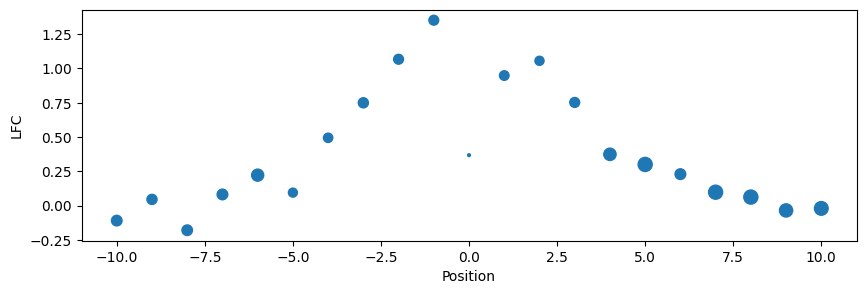

In [172]:
plt.scatter(positions, np.log((pop1_list+1)/(pop2_list+1)), s=0.2*total_counts)
plt.xlabel("Position")
plt.ylabel("LFC")

In [173]:
pop1_list

array([137, 135, 131, 153, 210, 110, 140, 181, 188, 200,  12, 172, 160,
       173, 233, 296, 165, 268, 265, 221, 240], dtype=int64)

In [174]:
pop1_list

array([137, 135, 131, 153, 210, 110, 140, 181, 188, 200,  12, 172, 160,
       173, 233, 296, 165, 268, 265, 221, 240], dtype=int64)

In [126]:
alpha_rep1 = 8
alpha_rep2 = 12
alpha_rep3 = 11

beta_rep1 = 9
beta_rep2 = 7
beta_rep3 = 5


alpha_ctrl_rep1 = 90
alpha_ctrl_rep2 = 94
alpha_ctrl_rep3 = 92

beta_ctrl_rep1 = 175
beta_ctrl_rep2 = 50
beta_ctrl_rep3 = 130




### Normalization

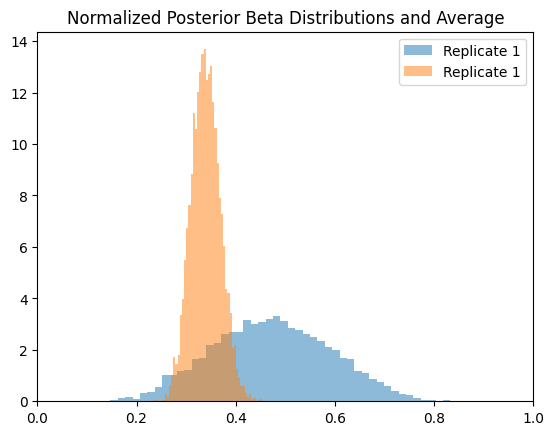

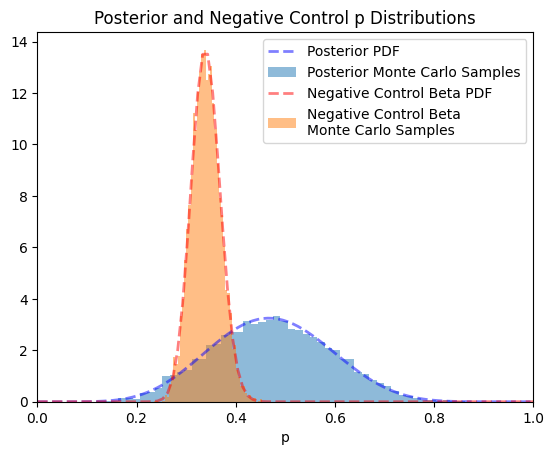

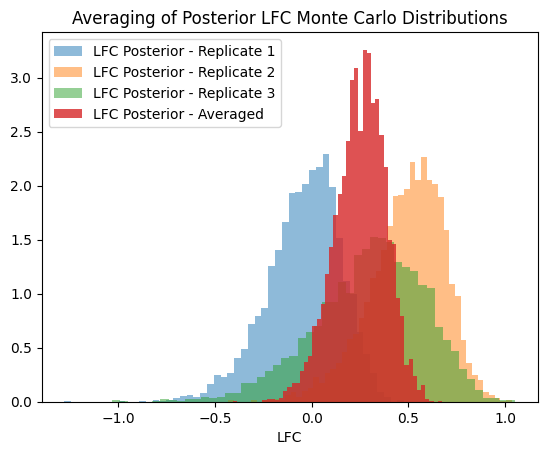

In [133]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np 

monte_carlo_trials = 5000

beta_post_rep1_mc_samples = beta.rvs(alpha_rep1, beta_rep1, size=monte_carlo_trials)
beta_ctrl1_rep1_mc_samples = beta.rvs(alpha_ctrl_rep1, beta_ctrl_rep1, size=monte_carlo_trials)

beta_post_rep2_mc_samples = beta.rvs(alpha_rep2, beta_rep2, size=monte_carlo_trials)
beta_ctrl1_rep2_mc_samples = beta.rvs(alpha_ctrl_rep2, beta_ctrl_rep2, size=monte_carlo_trials)

beta_post_rep3_mc_samples = beta.rvs(alpha_rep3, beta_rep3, size=monte_carlo_trials)
beta_ctrl1_rep3_mc_samples = beta.rvs(alpha_ctrl_rep3, beta_ctrl_rep3, size=monte_carlo_trials)

#beta_post_rep2_mc_samples = beta.rvs(alpha_rep2, beta_rep2, size=monte_carlo_trials)
#beta_ctrl1_rep2_mc_samples = beta.rvs(alpha_ctrl_rep2, beta_ctrl_rep2, size=monte_carlo_trials)


#beta_post_rep3_mc_samples = beta.rvs(alpha_rep3, beta_rep3, size=monte_carlo_trials)
#beta_ctrl1_rep3_mc_samples = beta.rvs(alpha_ctrl_rep3, beta_ctrl_rep3, size=monte_carlo_trials)

plt.hist(beta_post_rep1_mc_samples, bins=50, alpha=0.5, label="Replicate 1", density=True)
plt.hist(beta_ctrl1_rep1_mc_samples, bins=50, alpha=0.5, label="Replicate 1", density=True)
#plt.hist(beta_post_rep2_mc_samples, bins=50, alpha=0.5, label="Replicate 2", density=True)
#plt.hist(beta_post_rep3_mc_samples, bins=50, alpha=0.5, label="Replicate 3", density=True)
plt.legend()
plt.title("Normalized Posterior Beta Distributions and Average")
plt.xlim(0, 1)
plt.show()


normalize_beta_distribution = lambda posterior_beta_samples, control_beta_samples, baseline: (posterior_beta_samples / control_beta_samples) * 0.5

beta_ctrl1_rep1_mc_samples_normalized = normalize_beta_distribution(beta_ctrl1_rep1_mc_samples, beta_ctrl1_rep1_mc_samples2, 0.5)
beta_post_rep1_mc_samples_normalized = normalize_beta_distribution(beta_post_rep1_mc_samples, beta_ctrl1_rep1_mc_samples, 0.5)

x = np.linspace(0, 1.0, 100)
beta_post_rep1_pdf = beta.pdf(x, alpha_rep1, beta_rep1)
beta_ctrl1_rep1_pdf = beta.pdf(x, alpha_ctrl_rep1, beta_ctrl_rep1)
plt.plot(x, beta_post_rep1_pdf, "--", color="blue", alpha=0.5, lw=2, label="Posterior PDF")
plt.hist(beta_post_rep1_mc_samples, bins=50, alpha=0.5, label="Posterior Monte Carlo Samples", density=True)

plt.plot(x, beta_ctrl1_rep1_pdf, "--", color="red", alpha=0.5, lw=2, label="Negative Control Beta PDF")
plt.hist(beta_ctrl1_rep1_mc_samples, bins=50, alpha=0.5, label="Negative Control Beta \nMonte Carlo Samples", density=True)
#plt.hist(beta_post_rep2_mc_samples, bins=50, alpha=0.5, label="Replicate 2", density=True)
#plt.hist(beta_post_rep3_mc_samples, bins=50, alpha=0.5, label="Replicate 3", density=True)
plt.legend()
plt.title("Posterior and Negative Control p Distributions")
plt.xlabel("p")
plt.xlim(0, 1)
plt.show()

X1 = np.log(beta_post_rep1_mc_samples/beta_ctrl1_rep1_mc_samples)
X2 = np.log(beta_post_rep2_mc_samples/beta_ctrl1_rep2_mc_samples)
X3 = np.log(beta_post_rep3_mc_samples/beta_ctrl1_rep3_mc_samples)


plt.hist(X2, bins=50, alpha=0.5, density=True, label="LFC Posterior - Replicate 1")
plt.hist(X3, bins=50, alpha=0.5, density=True, label="LFC Posterior - Replicate 2")
plt.hist(X1, bins=50, alpha=0.5, density=True, label="LFC Posterior - Replicate 3")
plt.hist((X1 + X2 + X3)/3, bins=50, alpha=0.8, density=True, label="LFC Posterior - Averaged")
plt.legend()


plt.xlabel("LFC")
plt.title("Averaging of Posterior LFC Monte Carlo Distributions")
plt.show()

In [43]:
(0.8/0.3) * 0.5

1.3333333333333335

In [83]:
import numpy as np

def normalize_beta(Y,X):
    mean_X = np.mean(X)
    Y_shifted = Y - mean_X
    Y_scaled = Y_shifted / (2 * mean_X) + 0.5
    return Y_scaled

def transform_beta_sample(sample, mean):
    n = len(sample)
    original_mean = np.mean(sample)
    original_variance = np.var(sample, ddof=1)

    shifted_sample = sample - original_mean + mean
    scaled_sample = shifted_sample * np.sqrt(original_variance / np.var(shifted_sample, ddof=1))

    return scaled_sample

a=20
b=50
X = np.random.beta(a, b, 5000)
X_normal = transform_beta_sample(X, 1.2)

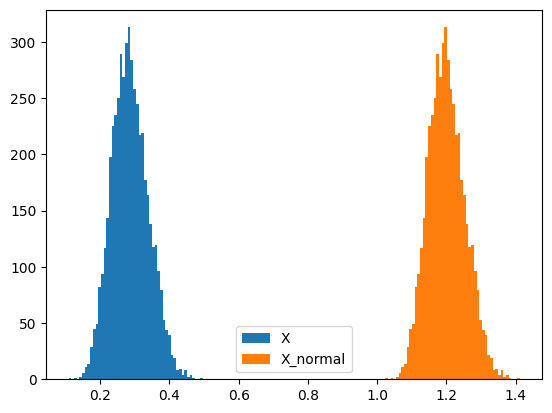

In [84]:
plt.hist(X, bins=50, label="X")
plt.hist(X_normal, bins=50, label="X_normal")
plt.legend()
plt.show()

(0.0, 1.0)

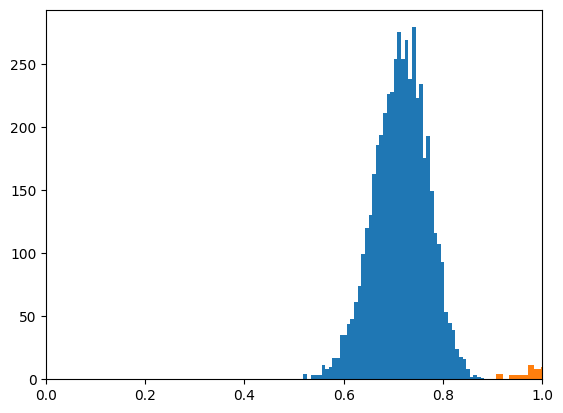

In [60]:
plt.hist(Y, bins=50)
plt.hist(Y_normalized, bins=50)
plt.xlim(0,1)